# Red neuronal y Back propagation

### ----- Aquí van las deducciones de las ecuaciones-----

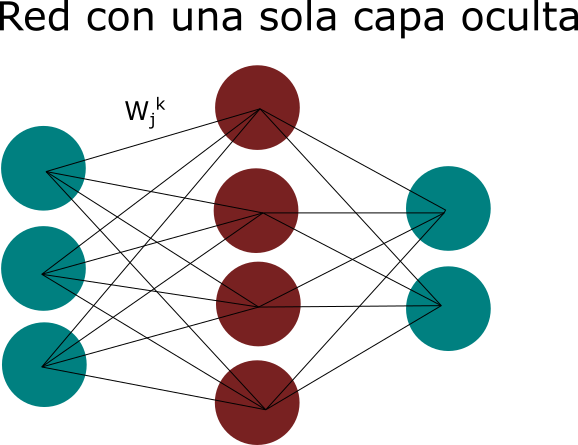

Vamos a trabajar con esta estructura de red, la cual cuenta con una sóla capa oculta. 

Con esta notacón denotamos con $l$ el número de la capa donde estamos trabajando, para los pesos los denotamos con $$w_j^{lk}$$
Donde k representa que ese peso proviene de la $k-esima$ neurona en la capa $l-1$ y entra en la $j-esima$ neurona, en la capa $l$

Para la representación de esta neurona tomaremos un conjunto de ejemplos, donde las entradas son $\{X\}$ y tienen salidas $\{Y\}$

Es decir esta red puede representarse por: $$F:X  \in R^3 --------> Y \in R^2$$



Ahora, para simplificar las cosas usaremos notación matricial, donde $W^l$ será la matriz de pesos asociada a la capa l, dicha matriz será formada tal que sus filas j, son los vetores de pesos asociados  a la neurona j, es decir: 
$$W^l=(W_1^k, W_2^k , ...)$$

También, cada capa tendrá un vector de sesgos asociados, denominado $$b^l$$

Antes de programar el aprendizaje con los ejemplos, debemos programar la red:

Definiremos: $$a^l=\sigma (W^la^{l-1}+b^l)$$

$$z^l=W^la^{l-1}+b^l$$

$$a^{l}=\sigma (z^l)$$

###### Definiendo la red

In [15]:
import numpy as np
import random as random


In [102]:
#Tomamos como función de activación sigmoide y su derivada
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    return np.exp(-x)/(1+np.exp(-x))**2

#Ahora definimos la red, a la cual le pediremos los parámetros: W^1,W^2,b^1,b^2

#Para el entrenamiento serán necesarios los valores de a^l, z^l
def red(X,W1,W2,b1,b2):
    #capa 1
    z1=np.dot(W1,X) + b1
    a1=sigmoid(z1)
    
    z2=np.dot(W2,a1) + b2
    a2=z2
    
    return (z1,a1,z2,a2)
    

##### Aprendizaje
En este caso, $W^1 \in R^{3x4}$ y $W^2 \in R^{4x2}$, además $b^1 \in R^{4}$ y $b^2 \in R^{2}$

Comenzaremos definiendo todos estos parámetros como arreglos de unos, para después ser modificados por el descenso del gradiente, de la siguiente manera:

$$W^l \longrightarrow W^l-\frac{\eta}{n} \sum_i^n \delta ^{l,i}(a^{l-1,i})^T$$

$$b^l \longrightarrow b^l-\frac{\eta}{n} \sum_i^n \delta ^{l,i}$$

Y tenemos las ecuaciones $$\delta ^{L,i}=\nabla_a C_i \odot \sigma'(z^{L,i})$$

para encontrar este error para la capa l tenemos:

$$\delta ^{l,i}=((W^l)^T \delta^{l+1,i})\odot \sigma'(z^{x,i})$$

Recordando que el subindice i representa que este error se dará para cada uno de los n ejemplos que tengamos y L es el número de la última capa.

pondremos a los ejemplos en un conjunto grande, así $X \in \bar{X}$, $Y \in \bar{Y}$


## Generación de datos sintéticos 
Vamos a entrenar a la red neuronal para que los pesos se ajusten a imitar el comportamiento de una función $$F:X  \in R^3 --------> Y \in R^2$$

En este caso definiremos la función como:
$$F(x_1,x_2,x_3)=(x_1^2+x_2^2,x_1 x_3)$$

In [103]:
def G(X):
    return [X[0]**2+X[1]**2,X[0]*X[2]]

#Ahora Tomaremos un conjunto de 1000 números aleatorios entre 0 y 100
X = 100*np.random.rand(1000,3)
Y=[]

for x in X:
    y=G(x)
    y=y+np.array([random.uniform(-3,3),random.uniform(-3,3)])
    Y.append(y)


In [104]:
#Aprendizaje
eta = 0.1
W1=np.ones((4,3))
W2=np.ones((2,4))
b1=np.ones((4))
b2=np.ones((2))

Gw1=np.zeros(np.shape(W1))
Gw2=np.zeros(np.shape(W2))
Gb1=np.zeros(np.shape(b1))
Gb2=np.zeros(np.shape(b2))

#Aquí tendremos nuestros ejemplos
n=len(X)
for k in range(100):
    for i in range(0,len(X)):
        z1,a1,z2,a2=red(X[i],W1,W2,b1,b2)
        #el error de la capa final, dL=d2=(a2-y)
        d2=a2-Y[i]
        #luego hay que sacar el error de la capa anterior 
        d1=np.dot(np.transpose(W2), d2)*dsigmoid(z1)
        #Ahora hay que definir el "gradiente" para actualizar los pesos y los bias
        Gw1=Gw1 + np.outer(d1, X[i])
        Gw2=Gw2 + np.outer(d2, a1)
        
        Gb1=Gb1 + d1
        Gb2=Gb2 + d2
    
    #Ahora actualizamos los valores de W y b
    W1=W1-(eta/n)*Gw1
    W2=W2-(eta/n)*Gw2
    b1=b1-(eta/n)*Gb1
    b2=b2-(eta/n)*Gb2
    

In [111]:
red([0,2,0],W1,W2,b1,b2)

(array([2.99951454, 2.99951454, 2.99951454, 2.99951454]),
 array([0.95255219, 0.95255219, 0.95255219, 0.95255219]),
 array([12882.49979814,  4740.69656926]),
 array([12882.49979814,  4740.69656926]))

In [113]:
W2

array([[2678.15814977, 2678.15814977, 2678.15814977, 2678.15814977],
       [ 985.54902787,  985.54902787,  985.54902787,  985.54902787]])